### Full Name : Mahdi Saieedi
### Student Number : 401207254
___

## P1: Introduction (5 points)
The dataset comprises various independent variables serving as predictors for loan results and one dependent variable, "Loan_Status." The independent variables include Gender, Marital status, Dependents, and so on. Initially, we conduct data exploration to understand the dataset better. Then, we do some data preprocessing to ready the data for the regression model. Finally, we train a regression model to predict the outcome.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The cell below will download the dataset.

In [3]:
!gdown 1sG5yPXWK7a6wFlsVc2XCjNkwCxdcsstM

Downloading...
From: https://drive.google.com/uc?id=1sG5yPXWK7a6wFlsVc2XCjNkwCxdcsstM
To: /content/Loan_Data.csv
100% 38.0k/38.0k [00:00<00:00, 64.0MB/s]


TODO: Load the dataset as a dataframe. Check for duplicate rows and if there are any, delete them. Display the first 10 rows. (5 points)

In [4]:
df = pd.read_csv('/content/Loan_Data.csv')
dup_rows = df[df.duplicated()]
print(dup_rows.index)
df.head(10)

Int64Index([], dtype='int64')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## P2: Data Exploration (18 points)
In this section, we perform some data exploration to get a better understanding of the data.

TODO: Display the count of each unique value in the 'property_area' column. (3 points)

In [6]:
area_counts = df['Property_Area'].value_counts()
print(area_counts)


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


TODO: Plot the correlation between different features. (use sns.heatmap) (3 points)

<ipython-input-7-f82d44346f4b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

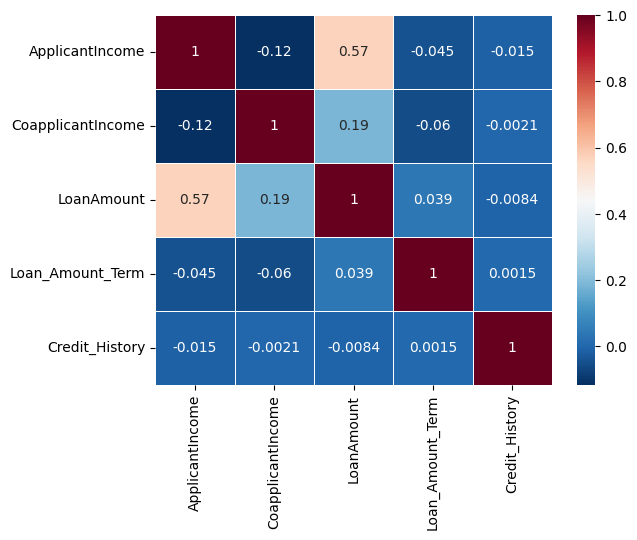

In [7]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,
            cmap='RdBu_r',annot=True,linewidth=0.5)

TODO: Plot a bar chart combining the 'Gender' and 'Loan_Status' columns (hint: use crosstab in pandas). Additionally, plot count plots for the 'Married' and 'Self_Employed' columns. (3 points)

<Axes: xlabel='Gender'>

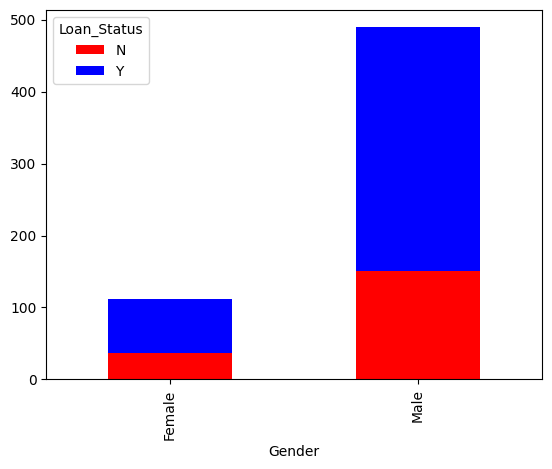

In [8]:
ct = pd.crosstab(df.Gender, df.Loan_Status)
ct.plot(kind='bar', stacked=True, color=['red','blue'])

<Axes: xlabel='Married', ylabel='count'>

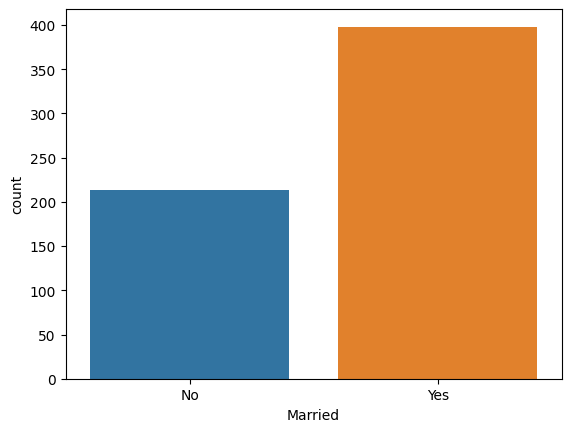

In [9]:
sns.countplot(x='Married', data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

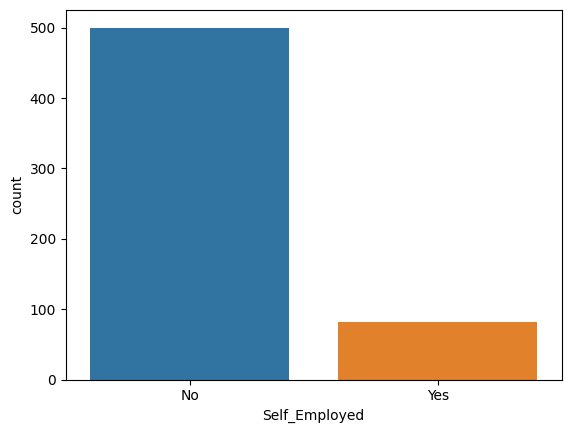

In [10]:
sns.countplot(x='Self_Employed', data=df)

TODO: Plot a pie chart for the 'Education' column. (3 points)

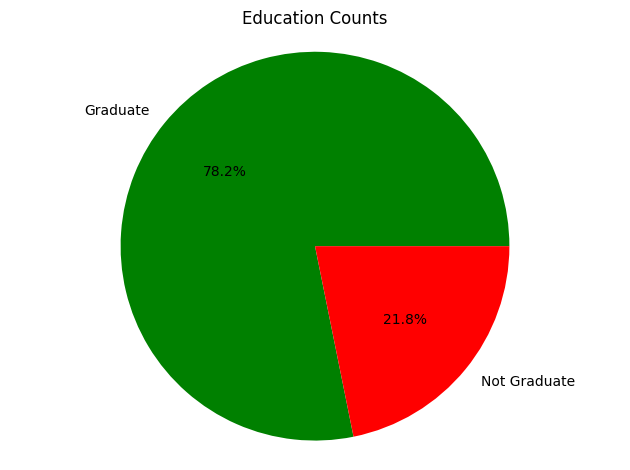

In [11]:
edu_counts = df['Education'].value_counts()
labels = edu_counts.index
sizes = edu_counts.values
colors = ['green', 'red']
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Education Counts')
plt.tight_layout()
plt.show()

TODO: Plot a box plot for the combination of 'Loan_Status' and 'ApplicantIncome' columns. (3 points)

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

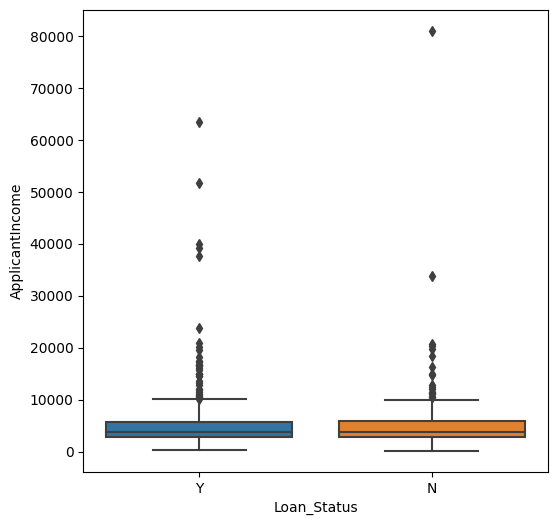

In [12]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)

TODO: Plot a histogram of the 'ApplicantIncome' column with 10 bins. (3 points)

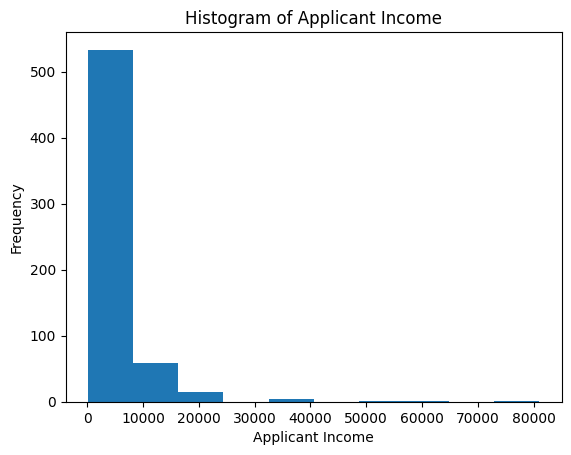

In [13]:
plt.hist(df['ApplicantIncome'], bins=10)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income')
plt.show()

## P3: Pre-processing (20 points)
In this section, we perform some pre-processing to make the data ready for the model.

TODO: Check for any null value. (2 point)

In [14]:
df.isnull().values.any()

True

In [15]:
null_cols = df.isnull().any()
null_cols

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [16]:
sum_null_col = df.isnull().sum()
sum_null_col

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
nul_df = df[df.isnull().any(axis=1)]
nul_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


TODO: As you can observe, there are some null values. Given the significance of credit history for loan status prediction, we cannot impute null values for this specific column. Therefore, delete all rows containing null values in the 'credit history' column. For other columns, fill null entries with the mode for non-float/int columns and with the mean for float/int columns. (8 points)

In [18]:
df.dropna(subset=['Credit_History'], inplace=True)

In [19]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [20]:
for col in df.columns:
  if not pd.api.types.is_numeric_dtype(df[col]):
    df[col].fillna(df[col].mode()[0], inplace=True)
  else:
    df[col].fillna(df[col].mean(), inplace=True)

In [21]:
#check if there is any null value again in any columns
sum_null_col = df.isnull().sum()
sum_null_col

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

TODO: There are some columns that are entirely independent of our dependent variable, such as Loan_ID. Please drop this column. (2 points)

In [22]:
df.drop('Loan_ID', axis=1, inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,145.088398,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


TODO: Separate the data into independent variables and the target variable. (1 point)

In [23]:
x = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = df[['Loan_Status']]

In [24]:
y

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y
...,...
609,Y
610,Y
611,Y
612,Y


In [25]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,145.088398,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban


TODO: Use LabelEncoder to transform categorical variables into numeric variables. (3 points)

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Encoded_Gender'] = le.fit_transform(x['Gender'])
x['Encoded_Married'] = le.fit_transform(x['Married'])
x['Encoded_Education	'] = le.fit_transform(x['Education'])
x['Encoded_Self_Employed'] = le.fit_transform(x['Self_Employed'])
x['Encoded_Property_Area'] = le.fit_transform(x['Property_Area'])
y['Encoded_Loan_Status'] = le.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-26-e8bd43831181>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Encoded_Loan_Status'] = le.fit_transform(y)


In [27]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Encoded_Gender,Encoded_Married,Encoded_Education\t,Encoded_Self_Employed,Encoded_Property_Area
0,Male,No,0,Graduate,No,5849,0.0,145.088398,360.0,1.0,Urban,1,0,0,0,2
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,1,1,0,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,1,0,1,2
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,1,1,0,2
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,0,0,0,0,0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1,1,0,0,0
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1,1,0,0,2
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1,1,0,0,2


In [28]:
y

,Loan_Status,Encoded_Loan_Status
0,Y,1
1,N,0
2,Y,1
3,Y,1
4,Y,1
...,...,...
609,Y,1
610,Y,1
611,Y,1
612,Y,1


In [29]:
x.drop(columns = ['Gender', 'Married', 'Education', 'Self_Employed',
                  'Property_Area'], axis=1, inplace=True)
y.drop('Loan_Status', axis=1, inplace=True)

<ipython-input-29-dcf997bf25b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.drop('Loan_Status', axis=1, inplace=True)


In [30]:
x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Encoded_Gender,Encoded_Married,Encoded_Education\t,Encoded_Self_Employed,Encoded_Property_Area
0,0,5849,0.0,145.088398,360.0,1.0,1,0,0,0,2
1,1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0
2,0,3000,0.0,66.000000,360.0,1.0,1,1,0,1,2
3,0,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,2
4,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0
610,3+,4106,0.0,40.000000,180.0,1.0,1,1,0,0,0
611,1,8072,240.0,253.000000,360.0,1.0,1,1,0,0,2
612,2,7583,0.0,187.000000,360.0,1.0,1,1,0,0,2


In [31]:
y

,Encoded_Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


TODO: Use StandardScaler for independant variables. (3 points)

In [32]:
type(x['Dependents'][610])

str

In [33]:
#we can not to this beacause there are several data points in Dependents columns
#labeled as +3 which are strings so we converts them to integer first
for index, row in x.iterrows():
  if x['Dependents'][index] == '3+':
    x['Dependents'][index] = float(3)
    print(index)

<ipython-input-33-da9017cb2c48>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Dependents'][index] = float(3)


7
34
61
68
73
74
78
109
126
135
155
171
172
177
202
211
213
215
255
257
267
295
321
324
338
340
343
352
359
376
390
391
409
442
461
466
472
481
515
522
531
539
557
567
574
592
602
610


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)

TODO: Divide data to train and test. (1 point)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1)

## P3: SKLearn Regression Model (10 points)

In this section, we perform logistic regression to predict the outcome.
Then we draw confusion matrix to see the accuracy of the model.

TODO: Train a logistic regression model using `sklearn` (6 points). Then use `sklearn`'s confusion matrix to check the result. (4 points)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8529411764705882


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
# Calculate confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 24  21]
 [  4 121]]


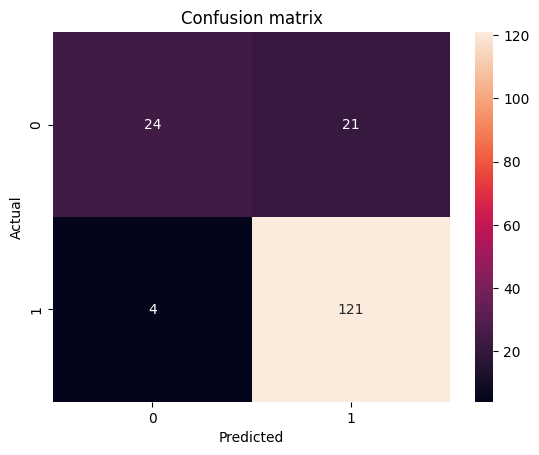

In [38]:
sns.heatmap(cnf_matrix, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## P4: Custom Regression Model (32 points)

TODO: Imeplement the Logistic Regression model. Complete these methods: `loss`, `loss_derivative`, `predict` and for loop of fit function. (27 points)

In [78]:
# class GDLogisticRegression:
#     def __init__(self, n_features, max_iter=50000, lr=0.0001, tol=1e-6, momentum=0.9):
#         self.N = n_features
#         self.beta = np.zeros((self.N+1,))
#         self.max_iter = max_iter
#         self.lr = lr
#         self.tol = tol
#         self.momentum = momentum

#     def loss(self, X, y):
#         z = np.dot(X, self.beta)
#         y_hat = 1 / (1 + np.exp(-z))
#         return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

#     def loss_derivative(self, X, y):
#         z = np.dot(X, self.beta)
#         y_hat = 1 / (1 + np.exp(-z))
#         return (y_hat - y).T @ X

#     def predict(self, X_test, threshold=0.5):
#         z = np.dot(X_test, self.beta)
#         y_hat = 1 / (1 + np.exp(-z))
#         y_pred = np.where(y_hat >= threshold, 1, 0)
#         return y_pred

#     def fit(self, X_train, y_train):
#         X_train_new = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
#         last_loss = 0
#         momentum = 0
#         for _ in range(self.max_iter):
#             loss = self.loss(X_train_new, y_train)
#             if abs(loss - last_loss) < self.tol:
#               break
#             last_loss = loss
#             gradients = self.loss_derivative(X_train_new, y_train)
#             momentum = self.momentum * momentum - self.lr * gradients
#             float_array = np.array([momentum])
#             self.beta += int(float_array)
#             return self


In [79]:
class GDLogisticRegression:
    def __init__(self, n_features, max_iter=50000, lr=0.0001, tol=1e-6, momentum=0.9):
        self.N = n_features + 1
        self.beta = np.zeros(self.N)
        self.max_iter = max_iter
        self.lr = lr
        self.tol = tol
        self.momentum = momentum

    def loss(self, X, y):
        predictions = self.sigmoid(X @ self.beta)
        loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
        return loss

    def loss_derivative(self, X, y):
        predictions = self.sigmoid(X @ self.beta)
        gradients = X.T @ (predictions - y) / X.shape[0]
        return gradients

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, X_test, threshold=0.5):
        predictions = self.sigmoid(X_test @ self.beta)
        labels = np.where(predictions > threshold, 1, 0)
        return labels

    def fit(self, X_train, y_train):
        X_train_new = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
        last_loss = 0
        momentum = 0

        for _ in range(self.max_iter):
            gradients = self.loss_derivative(X_train_new, y_train)

            # Apply momentum
            velocity = self.momentum * momentum - self.lr * gradients
            momentum = velocity

            self.beta += velocity

            current_loss = self.loss(X_train_new, y_train)
            if np.abs(current_loss - last_loss) < self.tol:
                break

            last_loss = current_loss



TODO: Predict the "Outcome" for the testing samples. (5 points)

In [80]:
def check_for_strings(arr):
  sw = 0
  arr_df = pd.DataFrame(arr)
  for index, row in arr_df.iterrows():
      for col, value in row.items():
          if type(value) is str:
            sw = 1
            print(f"Index: {index} Column: {col}, Value: {value}")

  if sw == 0:
    print("there is no string")

In [81]:
check_for_strings(X_train)

there is no string


In [82]:
check_for_strings(y_train)

there is no string


In [83]:
check_for_strings(X_test)

there is no string


In [84]:
type(X_test), type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray, pandas.core.frame.DataFrame)

In [85]:
y_train_nd = y_train.to_numpy()

In [86]:
X_train.shape , type(y_train_nd) ,y_train_nd.shape , y_train.shape

((394, 11), numpy.ndarray, (394, 1), (394, 1))

In [87]:
y_train_reshaped = y_train_nd.reshape(-1,)

In [88]:
model2 = GDLogisticRegression(n_features=X_train.shape[1])
model2.fit(X_train, y_train_reshaped)

In [89]:
y_pred_2 = model.predict(X_test)

# P5: Evaluation (15 points)

TODO: Calculate `precision`, `recall`, and `f1-score macro` using your own code. (Search what f1-score and recall are) **(each part 5 points)**

In [107]:
def precision(y_true, y_pred):
  y_true = y_true.squeeze()
  true_pos = np.sum(y_true * y_pred)
  false_pos = np.sum(y_pred * (1 - y_true))
  if true_pos + false_pos == 0:
    return 0
  else:
    return true_pos / (true_pos + false_pos)

def recall(y_true, y_pred):
  y_true = y_true.squeeze()
  true_pos = np.sum(y_true * y_pred)
  false_neg = np.sum((1 - y_true) * (1 - y_pred))
  if true_pos + false_neg == 0:
    return 0
  else:
    return true_pos / (true_pos + false_neg)

def f1_score(y_true, y_pred):
  p = precision(y_true, y_pred)
  r = recall(y_true, y_pred)
  if p + r == 0:
    return 0
  else:
    return 2 * p * r / (p + r)

In [109]:
type(y_pred_2), y_pred_2, y_pred_2.shape

(numpy.ndarray,
 array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1]),
 (170,))

In [110]:
y_test_nd = y_test.to_numpy()

In [111]:
type(y_test), y_test, y_test.shape

(pandas.core.frame.DataFrame,
      Encoded_Loan_Status
 51                     1
 267                    1
 555                    1
 499                    0
 388                    1
 ..                   ...
 338                    0
 262                    0
 62                     0
 575                    1
 572                    1
 
 [170 rows x 1 columns],
 (170, 1))

In [112]:
precision(y_test , y_pred_2)

0.852112676056338

In [114]:
recall(y_test , y_pred_2)

0.8344827586206897

In [115]:
f1_score(y_test , y_pred_2)

0.8432055749128919